# Árbol aumentos

---

[Conexión con base de datos](##Conexión-con-base-de-datos)

[Limpieza de datos](#Limpieza-de-datos)

[Metadata](#Metadata)

[Árbol de decisión](#Árbol-de-decisión)

## Conexión con base de datos
---
Realiza la conexión con base de datos local que contiene datos históricos

In [1]:
from matplotlib.font_manager import json_load
import pandas as pd
import json
import os
import psycopg2 as ps
from datetime import date, datetime, timedelta
# %%
pd.set_option('display.max_columns', None)

In [2]:
os.getcwd()

'C:\\Users\\lacia\\OneDrive\\Documents\\10. TFI\\0. Labs'

In [3]:
#ps.connect(host=hostname,dbname=database,user=username,password=pwd,port=portid)
def connect_to_db(host_name,db_name,port,username,password):
    try:
        conn = ps.connect(
            host = hostname,
            dbname = database,
            user = username,
            password = pwd,
            port = portid
        )
    except ps.OperationalError as e:
        raise e
    else:
        print("Connected!")
    return conn


In [4]:
# %%
#Parametros para conectarnos a la base de datos
hostname = "localhost"
database = 'precios_clarosdb'
username = 'postgres'
pwd = 'postgres'
portid = 5432
#conn = None
#cur = None



In [5]:
conn = connect_to_db(hostname,database,portid,username,pwd)

Connected!


In [6]:
def query(curr):
    consulta = ("""SELECT * FROM db_muestra;""")
    curr.execute(consulta)

In [7]:
curr = conn.cursor()

In [8]:
query(curr)

In [9]:
query_results = curr.fetchall()

In [10]:
columnas = ['key', 'bandera_id', 'lat', 'lng',
            'sucursalnombre', 'id_', 'sucursaltipo',
            'provincia', 'promo1_descripcion','promo1_precio',
            'preciolista','promo2_descripcion','promo2_precio',
            'actualizadohoy','direccion','banderadescripcion',
            'localidad','comerciorazonsocial','comercioid','marca','nombre',
           'presentacion','fecha']

In [11]:
df = pd.DataFrame(query_results, columns=columnas)

In [12]:
df.head()

,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,fecha
0,sucursales,1,-34.6036515,-58.405234,384 - BALVANERA,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Pueyrredon 576 (Balvanera),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
1,sucursales,1,-34.6764626,-58.4933966,386 - VILLA LUGANO,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Montiel 3829 (Villa Lugano),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
2,sucursales,1,-34.6530744,-58.4814134,387 - PARQUE AVELLANEDA,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Olivera 1268 (Villa Lugano),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
3,sucursales,1,-34.6262843,-58.4569877,389 - FLORES,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Boyaca 37 (Flores),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
4,sucursales,1,-35.0530892,-58.7606411,39 - CAÑUELAS,7790070012050,Autoservicio,AR-B,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Cl Rivadavia 800,Supermercados DIA,BUENOS AIRES,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24


## Limpieza de datos
---
Revisa tipo de datos obtenido y los convertimos de corresponder

In [13]:
df.describe()

,promo1_precio,preciolista,promo2_precio
count,48766.000000,883967.000000,169302.000000
mean,301.956851,300.008436,249.343296
std,97.320125,135.662823,123.814429
min,94.560000,0.000000,67.900000
25%,192.800000,167.660000,135.310000
50%,306.750000,320.100000,228.990000
75%,360.000000,383.000000,346.040000
max,602.650000,709.000000,556.400000


In [14]:
df.dtypes

key                     object
bandera_id              object
lat                     object
lng                     object
sucursalnombre          object
id_                     object
sucursaltipo            object
provincia               object
promo1_descripcion      object
promo1_precio          float64
preciolista            float64
promo2_descripcion      object
promo2_precio          float64
actualizadohoy          object
direccion               object
banderadescripcion      object
localidad               object
comerciorazonsocial     object
comercioid              object
marca                   object
nombre                  object
presentacion            object
fecha                   object
dtype: object

In [15]:
df['promo1_precio'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1153795     True
1153796     True
1153797     True
1153798     True
1153799     True
Name: promo1_precio, Length: 1153800, dtype: bool

In [16]:
df['lat'] = df['lat'].astype('float64')
df['lng'] = df['lng'].astype('float64')
df['fecha'] = pd.to_datetime(df['fecha'])


In [17]:
df.describe()

,lat,lng,promo1_precio,preciolista,promo2_precio
count,875937.000000,875937.000000,48766.000000,883967.000000,169302.000000
mean,-35.328574,-60.459678,301.956851,300.008436,249.343296
std,3.861188,3.579406,97.320125,135.662823,123.814429
min,-54.830640,-72.336170,94.560000,0.000000,67.900000
25%,-34.858230,-60.947400,192.800000,167.660000,135.310000
50%,-34.618229,-58.506874,306.750000,320.100000,228.990000
75%,-34.562834,-58.423667,360.000000,383.000000,346.040000
max,-22.513508,-55.876680,602.650000,709.000000,556.400000


In [18]:
print(df['fecha'].min())
print(df['fecha'].max())

2022-06-11 00:00:00
2022-08-25 00:00:00


## Metadata
---
Obtiene datos dólar blue a fin de realizar correlaciones

Fuente https://www.ambito.com/contenidos/dolar-informal-historico.html 11/09/2022 14:25hs

In [ ]:
import datetime
import matplotlib.pyplot as plt

In [ ]:
df_dolar = pd.read_excel('./data/Dolar_Blue.xlsx')
df_dolar.head()

In [ ]:
x = df_dolar['fecha']
y = df_dolar['promedio']
plt.plot(x,y)
plt.xticks(rotation=90)

In [ ]:
df_dolar.info()

In [ ]:
df_dolar['fecha']

In [ ]:
#Completamos valores de sábado y domingo con el valor del día anterior
df_dolar = (df_dolar.set_index('fecha')
      .reindex(pd.date_range('2022-06-10', '2022-09-09', freq='D'))
      .rename_axis(['fecha'])
      .fillna(method='ffill')
      .reset_index())

In [ ]:
df_dolar['fecha']

In [ ]:
df_dolar.head()

In [ ]:
x = df_dolar['fecha']
y = df_dolar['promedio']
plt.plot(x,y)
plt.xticks(rotation=90)

# Árbol de decisión
---

Árbol de decisión para encontrar fecha prevista de aumento de precios

In [19]:
import numpy
from sklearn.metrics import r2_score

C:\Users\lacia\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [20]:
lista = []
lista = df['marca'].unique()

print(lista)

['COCINERO' 'LIRA' 'TARAGUI' 'CAÑUELAS' 'MAÑANITA' 'FAVORITA' 'MORIXE'
 'CRUZ DE MALTA' 'PLAYADITO' 'LA MERCED' 'CASERITA']


In [21]:
df.keys()

Index(['key', 'bandera_id', 'lat', 'lng', 'sucursalnombre', 'id_',
       'sucursaltipo', 'provincia', 'promo1_descripcion', 'promo1_precio',
       'preciolista', 'promo2_descripcion', 'promo2_precio', 'actualizadohoy',
       'direccion', 'banderadescripcion', 'localidad', 'comerciorazonsocial',
       'comercioid', 'marca', 'nombre', 'presentacion', 'fecha'],
      dtype='object')

In [22]:
df_suc = df[df['sucursalnombre']=='Trelew']

In [23]:
df_suc.head()

,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,fecha
1502,sucursales,1,-43.257504,-65.305489,Trelew,7790070231468,Hipermercado,AR-U,,NaN,480.00,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,LIRA,Aceite de Girasol Lira 900 Cc,900.0 cc,2022-08-23
1749,sucursales,1,-43.257504,-65.305489,Trelew,7792590000227,Hipermercado,AR-U,,NaN,189.00,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg,2022-08-23
3830,sucursales,2,-43.249282,-65.290804,Trelew,7790070012050,Hipermercado,AR-U,"Llevando 1 unidades, pagás $201.28 c/u, promoc...",201.28,201.28,,NaN,true,Avenida Eva Perón 719,Changomas,TRELEW,Wal Mart Argentina S.R.L.,11,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-16
4577,sucursales,2,-43.249282,-65.290804,Trelew,7790387015324,Hipermercado,AR-U,"Llevando 1 unidades, pagás $428.00 c/u, promoc...",428.00,440.00,,NaN,true,Avenida Eva Perón 719,Changomas,TRELEW,Wal Mart Argentina S.R.L.,11,MAÑANITA,Yerba Mate Bajo Polvo 4 Flex Mañanita 500 Gr,500.0 gr,2022-08-16
4909,sucursales,2,-43.249282,-65.290804,Trelew,7793704000911,Hipermercado,AR-U,"Llevando 1 unidades, pagás $396.14 c/u, promoc...",396.14,396.14,,NaN,true,Avenida Eva Perón 719,Changomas,TRELEW,Wal Mart Argentina S.R.L.,11,PLAYADITO,Yerba Mate Suave con Palo Playadito 500 Gr,500.0 gr,2022-08-16


In [24]:
#Datos del dataset
print("size:"+str(df_suc.size))
print("shape:"+str(df_suc.shape))

size:19435
shape:(845, 23)


In [25]:
#Vemos registros de cada uno de los datos
for marca in lista:
    df_temp = df_suc[df_suc['marca']==marca]
    print(marca+" shape: "+str(df_temp.shape))

COCINERO shape: (66, 23)
LIRA shape: (78, 23)
TARAGUI shape: (150, 23)
CAÑUELAS shape: (18, 23)
MAÑANITA shape: (97, 23)
FAVORITA shape: (74, 23)
MORIXE shape: (49, 23)
CRUZ DE MALTA shape: (52, 23)
PLAYADITO shape: (155, 23)
LA MERCED shape: (58, 23)
CASERITA shape: (48, 23)


In [26]:
#Tomo la yerba taragui para predecir 
df_t = df_suc[df_suc['marca']=='TARAGUI']
df_t = df_t[df_t['comercioid']=='10']
df_t.head()

,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,fecha
23423,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,337.51,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-08-16
36473,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,337.51,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-08-17
49498,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,337.51,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-08-18
62715,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,337.51,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-08-19
72741,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,327.68,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-07-17


In [27]:
df_t.shape

(56, 23)

In [28]:
#Ordeno por fecha
df_t = df_t.sort_values(by='fecha')

In [29]:
#Redondeo variable precio de lista y agrego feature aumento
df_t['preciolista']=df_t['preciolista'].round(2)

df_t['aumento'] = (df_t['preciolista'].shift()!=df_t['preciolista'])

In [30]:
df_t.head()

,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,fecha,aumento
561834,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,309.14,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-06-11,True
586950,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,309.14,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-06-12,False
665904,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,309.14,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-06-13,False
672826,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,309.14,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-06-14,False
679755,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,309.14,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-06-16,False


In [31]:
df.keys()

Index(['key', 'bandera_id', 'lat', 'lng', 'sucursalnombre', 'id_',
       'sucursaltipo', 'provincia', 'promo1_descripcion', 'promo1_precio',
       'preciolista', 'promo2_descripcion', 'promo2_precio', 'actualizadohoy',
       'direccion', 'banderadescripcion', 'localidad', 'comerciorazonsocial',
       'comercioid', 'marca', 'nombre', 'presentacion', 'fecha'],
      dtype='object')

In [32]:
l_marcas = []
l_marcas = df['marca'].unique()

l_suc = []
l_suc = df['sucursalnombre'].unique()

l_comercioid = []
l_comercioid = df['comercioid'].unique()


print(l_marcas)

print(l_suc)

print(l_comercioid)

['COCINERO' 'LIRA' 'TARAGUI' 'CAÑUELAS' 'MAÑANITA' 'FAVORITA' 'MORIXE'
 'CRUZ DE MALTA' 'PLAYADITO' 'LA MERCED' 'CASERITA']
['384 - BALVANERA' '386 - VILLA LUGANO' '387 - PARQUE AVELLANEDA' ...
 'Ituzaingó II' 'Banfield [Maipu 339/337]' 'SuperCentral.Tapalque']
['15' '5' '12' '6' '10' '9' '11' '36' '16' '2' '14' '13' '19' '21' '20'
 '49' '50' '7' '1' '18' '3' '35' '4' '44' '45' '46' '47' '24' '8' '65'
 '25' '29' '23' '17']


In [33]:
df2 = df.sort_values(['marca', 'sucursalnombre','comercioid','fecha'],
              ascending = [True, True, True, True])

In [34]:
df2.head()

,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,fecha
550504,sucursales,1,-34.597137,-58.497643,1 - VILLA DEL PARQUE,7792590000227,Autoservicio,AR-C,,NaN,145.8,(0% de descuento).,145.80,true,Cl Beiro 3146,Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg,2022-06-11
573274,sucursales,1,-34.597137,-58.497643,1 - VILLA DEL PARQUE,7792590000227,Autoservicio,AR-C,,NaN,145.8,(0% de descuento).,145.80,true,Cl Beiro 3146,Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg,2022-06-12
623875,sucursales,1,-34.597137,-58.497643,1 - VILLA DEL PARQUE,7792590000227,Autoservicio,AR-C,,NaN,145.8,(15% de descuento). Abonando con tarjeta CREDI...,123.93,true,Cl Beiro 3146,Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg,2022-06-13
636589,sucursales,1,-34.597137,-58.497643,1 - VILLA DEL PARQUE,7792590000227,Autoservicio,AR-C,,NaN,145.8,(15% de descuento). Abonando con tarjeta de Ba...,123.93,true,Cl Beiro 3146,Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg,2022-06-14
648469,sucursales,1,-34.597137,-58.497643,1 - VILLA DEL PARQUE,7792590000227,Autoservicio,AR-C,,NaN,145.8,(0% de descuento).,145.80,true,Cl Beiro 3146,Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg,2022-06-16


In [35]:
df2.head()

,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,fecha
550504,sucursales,1,-34.597137,-58.497643,1 - VILLA DEL PARQUE,7792590000227,Autoservicio,AR-C,,NaN,145.8,(0% de descuento).,145.80,true,Cl Beiro 3146,Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg,2022-06-11
573274,sucursales,1,-34.597137,-58.497643,1 - VILLA DEL PARQUE,7792590000227,Autoservicio,AR-C,,NaN,145.8,(0% de descuento).,145.80,true,Cl Beiro 3146,Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg,2022-06-12
623875,sucursales,1,-34.597137,-58.497643,1 - VILLA DEL PARQUE,7792590000227,Autoservicio,AR-C,,NaN,145.8,(15% de descuento). Abonando con tarjeta CREDI...,123.93,true,Cl Beiro 3146,Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg,2022-06-13
636589,sucursales,1,-34.597137,-58.497643,1 - VILLA DEL PARQUE,7792590000227,Autoservicio,AR-C,,NaN,145.8,(15% de descuento). Abonando con tarjeta de Ba...,123.93,true,Cl Beiro 3146,Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg,2022-06-14
648469,sucursales,1,-34.597137,-58.497643,1 - VILLA DEL PARQUE,7792590000227,Autoservicio,AR-C,,NaN,145.8,(0% de descuento).,145.80,true,Cl Beiro 3146,Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg,2022-06-16


# Test

In [ ]:
df2['var_precio_lista'] = (df2['preciolista'].shift()!=df2['preciolista'])
df2.head(3)

# Comenzamos el arbol

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn import tree
import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
df2.keys()

Index(['key', 'bandera_id', 'lat', 'lng', 'sucursalnombre', 'id_',
       'sucursaltipo', 'provincia', 'promo1_descripcion', 'promo1_precio',
       'preciolista', 'promo2_descripcion', 'promo2_precio', 'actualizadohoy',
       'direccion', 'banderadescripcion', 'localidad', 'comerciorazonsocial',
       'comercioid', 'marca', 'nombre', 'presentacion', 'fecha'],
      dtype='object')

In [38]:
df3 = df2.copy()

In [39]:
df3.head(3)

,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,fecha
550504,sucursales,1,-34.597137,-58.497643,1 - VILLA DEL PARQUE,7792590000227,Autoservicio,AR-C,,NaN,145.8,(0% de descuento).,145.80,true,Cl Beiro 3146,Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg,2022-06-11
573274,sucursales,1,-34.597137,-58.497643,1 - VILLA DEL PARQUE,7792590000227,Autoservicio,AR-C,,NaN,145.8,(0% de descuento).,145.80,true,Cl Beiro 3146,Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg,2022-06-12
623875,sucursales,1,-34.597137,-58.497643,1 - VILLA DEL PARQUE,7792590000227,Autoservicio,AR-C,,NaN,145.8,(15% de descuento). Abonando con tarjeta CREDI...,123.93,true,Cl Beiro 3146,Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg,2022-06-13


In [40]:
df3.shape

(1153800, 23)

In [41]:
df3['promo1_precio'].nunique()

298

In [42]:
df3['promo2_precio'].nunique()

161

In [43]:
df3.dtypes

key                            object
bandera_id                     object
lat                           float64
lng                           float64
sucursalnombre                 object
id_                            object
sucursaltipo                   object
provincia                      object
promo1_descripcion             object
promo1_precio                 float64
preciolista                   float64
promo2_descripcion             object
promo2_precio                 float64
actualizadohoy                 object
direccion                      object
banderadescripcion             object
localidad                      object
comerciorazonsocial            object
comercioid                     object
marca                          object
nombre                         object
presentacion                   object
fecha                  datetime64[ns]
dtype: object

In [44]:
df3.keys()

Index(['key', 'bandera_id', 'lat', 'lng', 'sucursalnombre', 'id_',
       'sucursaltipo', 'provincia', 'promo1_descripcion', 'promo1_precio',
       'preciolista', 'promo2_descripcion', 'promo2_precio', 'actualizadohoy',
       'direccion', 'banderadescripcion', 'localidad', 'comerciorazonsocial',
       'comercioid', 'marca', 'nombre', 'presentacion', 'fecha'],
      dtype='object')

In [45]:
df3 = df3.set_index('fecha')


In [46]:
pd.date_range(start = '2022-06-11', end = '2022-08-25').difference(df3.index)

DatetimeIndex(['2022-06-15', '2022-06-20', '2022-06-27', '2022-07-07',
               '2022-07-22', '2022-08-01', '2022-08-02', '2022-08-07',
               '2022-08-08', '2022-08-13', '2022-08-15', '2022-08-20'],
              dtype='datetime64[ns]', freq=None)

In [47]:
fechas_l = pd.date_range(start = '2022-06-11', end = '2022-08-25').difference(df3.index)

In [48]:
df3 = df3.reset_index('fecha')

In [49]:
for fecha in fechas_l:
    fecha_falt = fecha
    fecha_ant = fecha + timedelta(days=-1)
    df3 = df3.set_index('fecha')
    df_temp = df3.loc[fecha_ant]
    df_temp.reset_index(inplace=True)
    df_temp = df_temp.replace([fecha_ant],fecha)
    df3 = df3.reset_index('fecha')
    df3 = df3.append(df_temp)

<ipython-input-49-86076d34135b>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df_temp)
<ipython-input-49-86076d34135b>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df_temp)
<ipython-input-49-86076d34135b>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df_temp)
<ipython-input-49-86076d34135b>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df_temp)
<ipython-input-49-86076d34135b>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df_temp)
<ipython-input-49-86

In [50]:
#Prueba si trae datos
df3.loc[df3['fecha']=='2022-08-02']

,fecha,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion
1258680,2022-08-02,sucursales,1,-34.597137,-58.497643,1 - VILLA DEL PARQUE,7792590000227,Autoservicio,AR-C,,NaN,161.13,,NaN,true,Cl Beiro 3146,Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg
1258681,2022-08-02,sucursales,1,-34.601775,-58.561817,10 - CASEROS,7792590000227,Autoservicio,AR-B,,NaN,161.13,,NaN,true,Cl San Martin 2146,Supermercados DIA,BUENOS AIRES,DIA Argentina S.A,15,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg
1258682,2022-08-02,sucursales,1,-34.524729,-58.547319,100 - VILLA ADELINA,7792590000227,Autoservicio,AR-B,,NaN,161.13,,NaN,true,Av Parana 6370,Supermercados DIA,BUENOS AIRES,DIA Argentina S.A,15,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg
1258683,2022-08-02,sucursales,1,-34.808870,-58.388804,1002 - ADROGUE,7792590000227,Autoservicio,AR-B,,NaN,161.13,,NaN,true,Cl Espora 1462,Supermercados DIA,BUENOS AIRES,DIA Argentina S.A,15,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg
1258684,2022-08-02,sucursales,1,-34.488768,-58.724695,1003 - GRAND BOURG,7792590000227,Autoservicio,AR-B,,NaN,161.13,,NaN,true,Cl El Callao 1242,Supermercados DIA,BUENOS AIRES,DIA Argentina S.A,15,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277245,2022-08-02,sucursales,3,-34.603522,-58.471445,Álvarez Jonte 1938,7790387013627,Autoservicio,AR-C,,NaN,303.41,,NaN,true,Álvarez Jonte 1938,Express,Ciudad Autónoma de Buenos Aires,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr
1277246,2022-08-02,sucursales,3,-34.609409,-58.486038,Álvarez Jonte 3079,7790387013627,Autoservicio,AR-C,,NaN,303.41,,NaN,true,Álvarez Jonte 3079,Express,Ciudad Autónoma de Buenos Aires,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr
1277247,2022-08-02,sucursales,3,-34.578743,-58.469274,Álvarez Thomas 1996,7790387013627,Autoservicio,AR-C,,NaN,303.41,,NaN,true,Av. Álvarez Thomas 1996,Express,Ciudad Autónoma de Buenos Aires,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr
1277248,2022-08-02,sucursales,3,-34.581280,-58.449050,Álvarez Thomas 372,7790387013627,Autoservicio,AR-C,,NaN,303.41,,NaN,true,Av. Álvarez Thomas 372,Express,Ciudad Autónoma de Buenos Aires,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr


In [52]:
#Reordeno DF
df3 = df3.sort_values(['fecha'],
              ascending = [True])

In [55]:
df3.tail(2)

,fecha,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion
884018,2022-08-25,sucursales,1,NaN,NaN,NaN,7790199000020,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,MORIXE,Harina de Trigo 0000 Morixe 1 Kg,1.0 kg
435867,2022-08-25,sucursales,1,-34.46929,-58.651223,270 - TIGRE,7790070507242,Autoservicio,AR-B,,NaN,152.02,,NaN,true,Cl Hipolito Yrigoyen 1973,Supermercados DIA,BUENOS AIRES,DIA Argentina S.A,15,FAVORITA,Harina 0000 Vitazink Favorita 1 Kg,1.0 kg


# Incorporacion features arbol

In [56]:
df3['var_precio_lista'] = (df3['preciolista'].shift()!=df3['preciolista'])
df3.head(3)

,fecha,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,var_precio_lista
0,2022-06-11,sucursales,1,-34.597137,-58.497643,1 - VILLA DEL PARQUE,7792590000227,Autoservicio,AR-C,,NaN,145.8,(0% de descuento).,145.80,true,Cl Beiro 3146,Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg,True
17396,2022-06-11,sucursales,1,-34.655217,-58.522391,306 - LINIERS,7792590000227,Autoservicio,AR-C,,NaN,145.8,(0% de descuento).,145.80,true,Cl Emilio Castro 7471,Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg,False
856553,2022-06-11,sucursales,1,-34.519576,-58.753100,JOSE C. PAZ,7790199000020,Hipermercado,AR-B,,NaN,125.0,"LLEVANDO ESTE ARTICULO, 15% DE DTO CON TARJETA...",106.25,true,Hipolito Yrigoyen 1826,COTO CICSA,Jose C Paz,Coto Centro Integral de Comercialización S.A.,12,MORIXE,Harina de Trigo 0000 Morixe 1 Kg,1.0 kg,True


In [57]:
df3.var_precio_lista = df3.var_precio_lista.map({True:"Si",False:"No"})
df3.head()

,fecha,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,var_precio_lista
0,2022-06-11,sucursales,1,-34.597137,-58.497643,1 - VILLA DEL PARQUE,7792590000227,Autoservicio,AR-C,,NaN,145.8,(0% de descuento).,145.80,true,Cl Beiro 3146,Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg,Si
17396,2022-06-11,sucursales,1,-34.655217,-58.522391,306 - LINIERS,7792590000227,Autoservicio,AR-C,,NaN,145.8,(0% de descuento).,145.80,true,Cl Emilio Castro 7471,Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg,No
856553,2022-06-11,sucursales,1,-34.519576,-58.753100,JOSE C. PAZ,7790199000020,Hipermercado,AR-B,,NaN,125.0,"LLEVANDO ESTE ARTICULO, 15% DE DTO CON TARJETA...",106.25,true,Hipolito Yrigoyen 1826,COTO CICSA,Jose C Paz,Coto Centro Integral de Comercialización S.A.,12,MORIXE,Harina de Trigo 0000 Morixe 1 Kg,1.0 kg,Si
701402,2022-06-11,sucursales,1,-34.858230,-58.389308,279 - LONGCHAMPS,7790387015324,Autoservicio,AR-B,,NaN,339.0,(0% de descuento).,339.00,true,Cl Rivadavia 1495,Supermercados DIA,BUENOS AIRES,DIA Argentina S.A,15,MAÑANITA,Yerba Mate Bajo Polvo 4 Flex Mañanita 500 Gr,500.0 gr,Si
779515,2022-06-11,sucursales,1,-35.820290,-61.898013,Pehuajó II,7790387015324,Autoservicio,AR-B,,NaN,305.0,,NaN,true,Av. San Martín 105,Cooperativa Obrera Limitada de Consumo y Vivienda,Pehuajó,Cooperativa Obrera Limitada de Consumo y Vivienda,13,MAÑANITA,Yerba Mate Bajo Polvo 4 Flex Mañanita 500 Gr,500.0 gr,Si


In [58]:
df3.sucursalnombre = pd.factorize(df3.sucursalnombre)[0]


In [59]:
df3.sucursaltipo = pd.factorize(df3.sucursaltipo)[0]

In [60]:
df3.provincia = pd.factorize(df3.provincia)[0]

In [61]:
df3.banderadescripcion = pd.factorize(df3.banderadescripcion)[0]

In [62]:
df3.localidad = pd.factorize(df3.localidad)[0]

In [63]:
df3.comerciorazonsocial = pd.factorize(df3.comerciorazonsocial)[0]

In [64]:
df3.marca = pd.factorize(df3.marca)[0]

In [65]:
df3.fecha = df['fecha'].apply(lambda x: x.value)

In [66]:
df3['HayPromo1'] = np.where(df3['promo1_precio']>0,1,0)

In [67]:
df3['HayPromo2'] = np.where(df3['promo2_precio']>0,1,0)

In [68]:
df3.dtypes

fecha                  float64
key                     object
bandera_id              object
lat                    float64
lng                    float64
sucursalnombre           int64
id_                     object
sucursaltipo             int64
provincia                int64
promo1_descripcion      object
promo1_precio          float64
preciolista            float64
promo2_descripcion      object
promo2_precio          float64
actualizadohoy          object
direccion               object
banderadescripcion       int64
localidad                int64
comerciorazonsocial      int64
comercioid              object
marca                    int64
nombre                  object
presentacion            object
var_precio_lista        object
HayPromo1                int32
HayPromo2                int32
dtype: object

In [69]:
df3.shape

(1372890, 26)

In [70]:
df3.head()

,fecha,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,var_precio_lista,HayPromo1,HayPromo2
0,1.661299e+18,sucursales,1,-34.597137,-58.497643,0,7792590000227,0,0,,NaN,145.8,(0% de descuento).,145.80,true,Cl Beiro 3146,0,0,0,15,0,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg,Si,0,1
17396,1.660608e+18,sucursales,1,-34.655217,-58.522391,1,7792590000227,0,0,,NaN,145.8,(0% de descuento).,145.80,true,Cl Emilio Castro 7471,0,0,0,15,0,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg,No,0,1
856553,1.656547e+18,sucursales,1,-34.519576,-58.753100,2,7790199000020,1,1,,NaN,125.0,"LLEVANDO ESTE ARTICULO, 15% DE DTO CON TARJETA...",106.25,true,Hipolito Yrigoyen 1826,1,1,1,12,1,Harina de Trigo 0000 Morixe 1 Kg,1.0 kg,Si,0,1
701402,1.657584e+18,sucursales,1,-34.858230,-58.389308,3,7790387015324,0,1,,NaN,339.0,(0% de descuento).,339.00,true,Cl Rivadavia 1495,0,2,0,15,2,Yerba Mate Bajo Polvo 4 Flex Mañanita 500 Gr,500.0 gr,Si,0,1
779515,1.656374e+18,sucursales,1,-35.820290,-61.898013,4,7790387015324,0,1,,NaN,305.0,,NaN,true,Av. San Martín 105,2,3,2,13,2,Yerba Mate Bajo Polvo 4 Flex Mañanita 500 Gr,500.0 gr,Si,0,0


In [71]:
df3.keys()

Index(['fecha', 'key', 'bandera_id', 'lat', 'lng', 'sucursalnombre', 'id_',
       'sucursaltipo', 'provincia', 'promo1_descripcion', 'promo1_precio',
       'preciolista', 'promo2_descripcion', 'promo2_precio', 'actualizadohoy',
       'direccion', 'banderadescripcion', 'localidad', 'comerciorazonsocial',
       'comercioid', 'marca', 'nombre', 'presentacion', 'var_precio_lista',
       'HayPromo1', 'HayPromo2'],
      dtype='object')

In [73]:
df3.dtypes

fecha                  float64
key                     object
bandera_id              object
lat                    float64
lng                    float64
sucursalnombre           int64
id_                     object
sucursaltipo             int64
provincia                int64
promo1_descripcion      object
promo1_precio          float64
preciolista            float64
promo2_descripcion      object
promo2_precio          float64
actualizadohoy          object
direccion               object
banderadescripcion       int64
localidad                int64
comerciorazonsocial      int64
comercioid              object
marca                    int64
nombre                  object
presentacion            object
var_precio_lista        object
HayPromo1                int32
HayPromo2                int32
dtype: object

In [74]:
for col in df3:
    df3[col] = df3[col].fillna(0)

In [75]:
df3.shape

(1372890, 26)

In [76]:
# we first split the dataset into training (200 samples) and test sets.
X = df3[["lat","lng","sucursalnombre","sucursaltipo","provincia","preciolista","banderadescripcion","localidad","comerciorazonsocial","marca","fecha"]]
y = df3.HayPromo1
train_size = 1000000
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, 
                                    test_size=X.shape[0]-train_size, random_state=0)

In [77]:
X.head()

,lat,lng,sucursalnombre,sucursaltipo,provincia,preciolista,banderadescripcion,localidad,comerciorazonsocial,marca,fecha
0,-34.597137,-58.497643,0,0,0,145.8,0,0,0,0,1.661299e+18
17396,-34.655217,-58.522391,1,0,0,145.8,0,0,0,0,1.660608e+18
856553,-34.519576,-58.753100,2,1,1,125.0,1,1,1,1,1.656547e+18
701402,-34.858230,-58.389308,3,0,1,339.0,0,2,0,2,1.657584e+18
779515,-35.820290,-61.898013,4,0,1,305.0,2,3,2,2,1.656374e+18


In [78]:
# to build a tree, we could use 'gini' or 'entropy' as split criterion at each node. 
# here we use an example use 'gini' and with a few other hyperparameters.
criteria = "gini" 
max_depth = 6 
min_sample_leaf = 4
clf_gini = DecisionTreeClassifier(criterion=criteria, random_state=100,
                                max_depth=max_depth, min_samples_leaf=min_sample_leaf)
clf_gini.fit(X_train, y_train)
print(clf_gini.score(X_train, y_train))

0.974815


In [79]:
import os
path = os.getcwd()
path


'C:\\Users\\lacia\\OneDrive\\Documents\\10. TFI\\0. Labs'

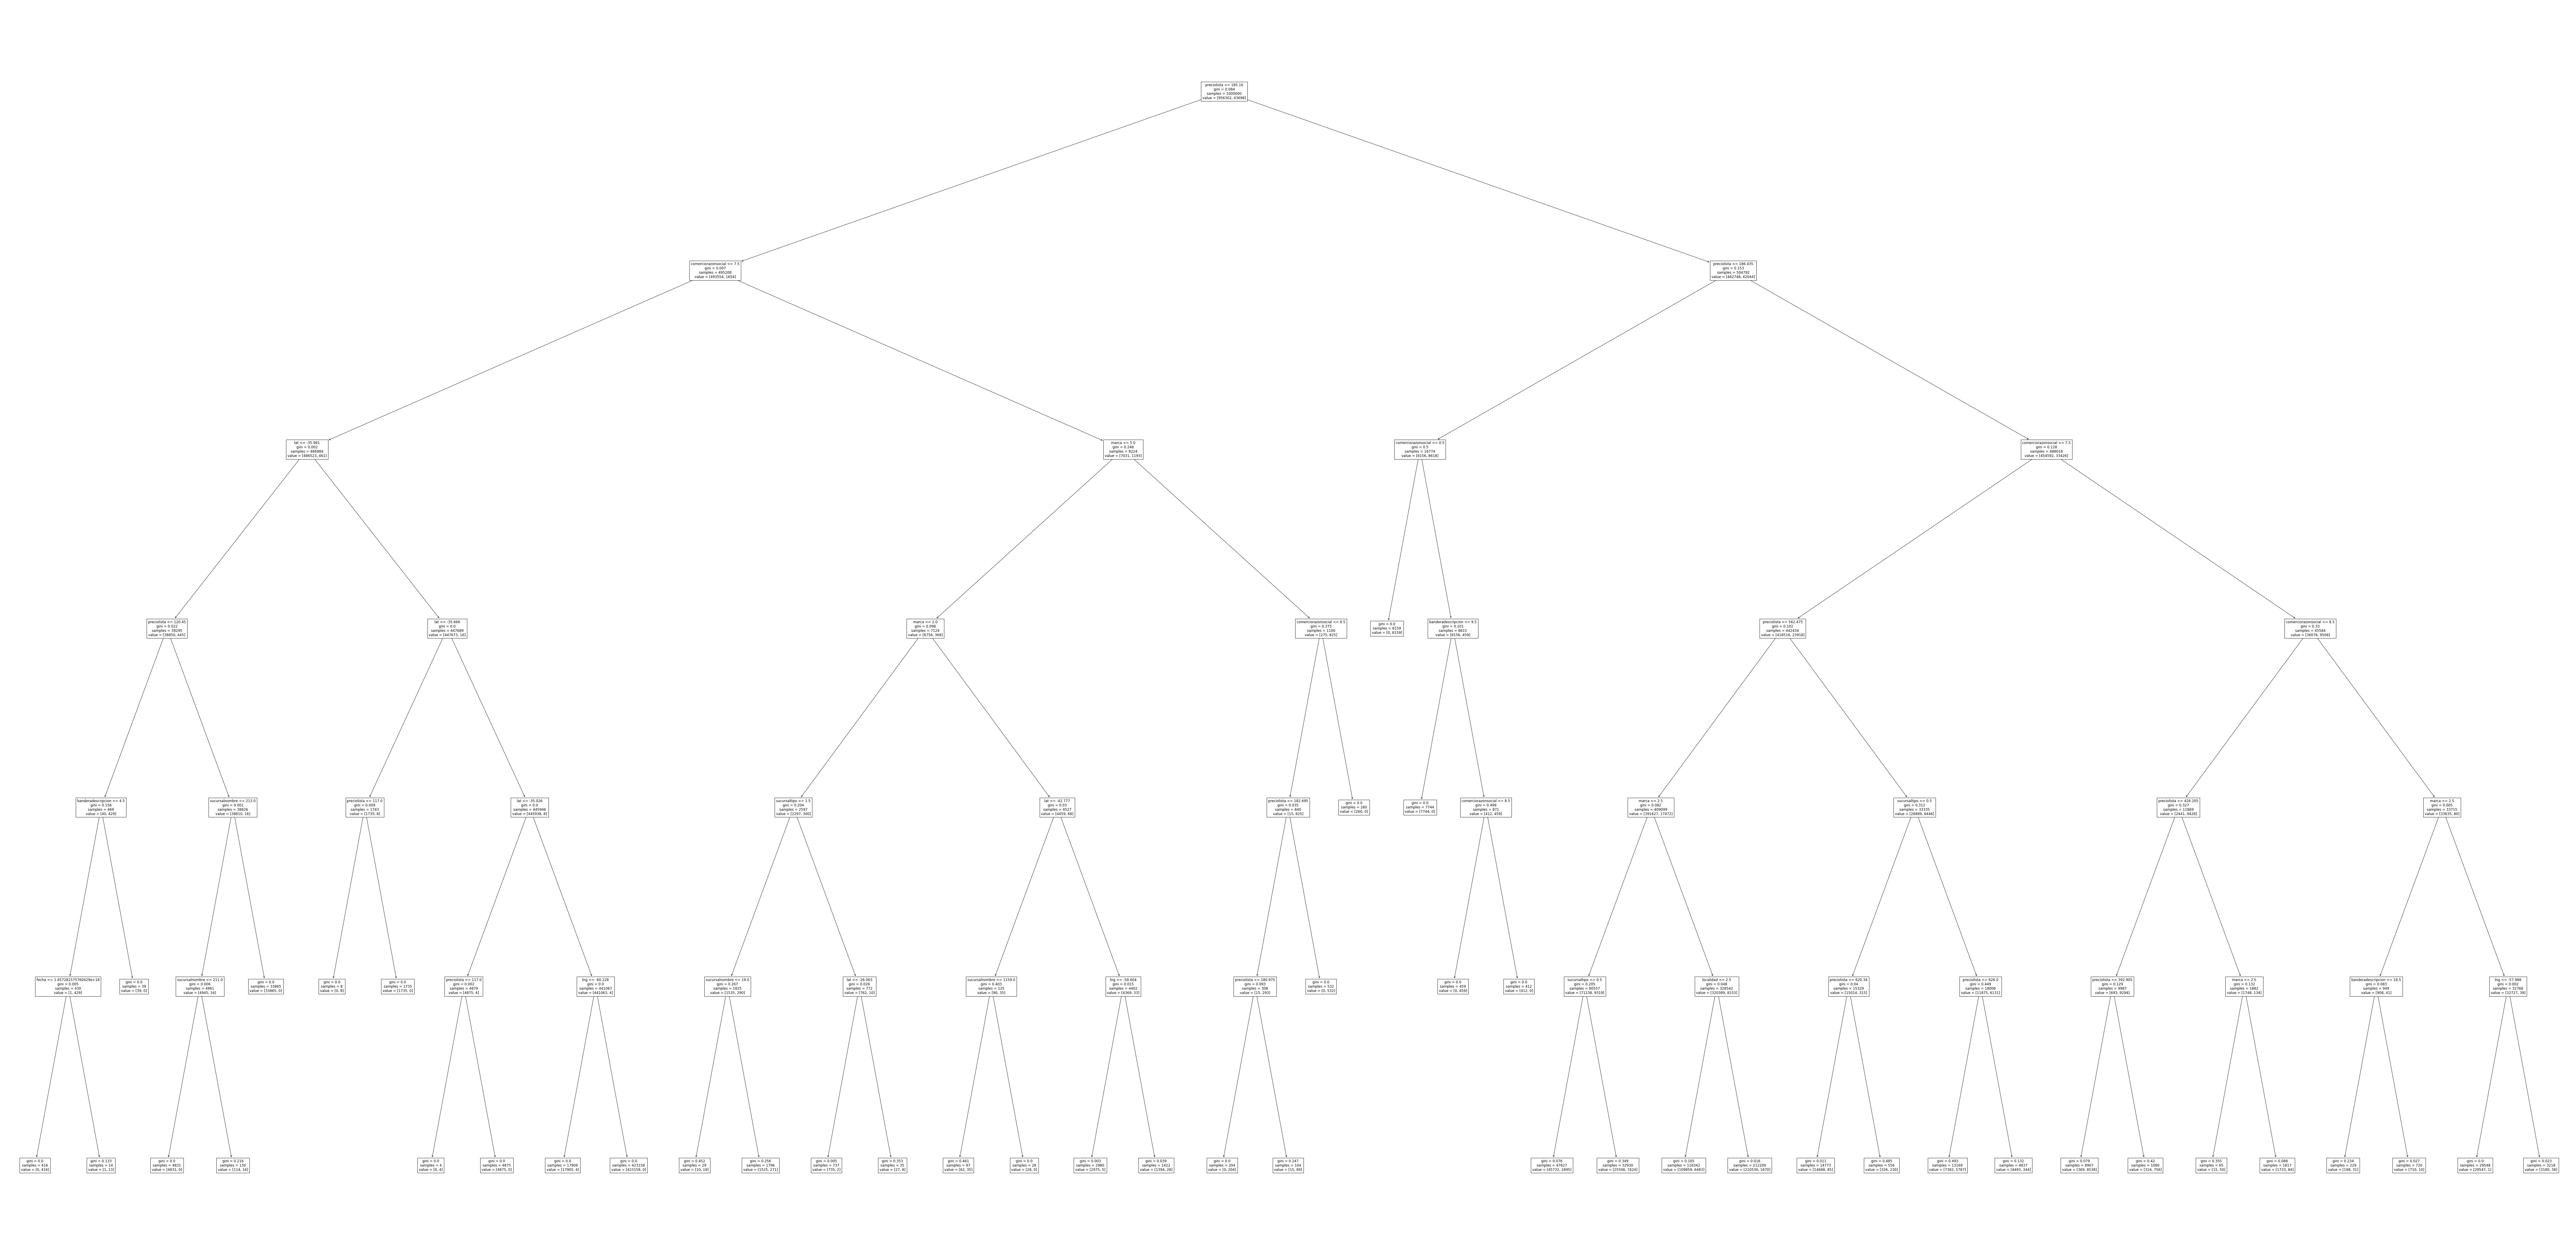

In [80]:
# one attractive feature of a tree is visulization. 

plt.figure(figsize=(160,80))  # customize according to the size of your tree
plot_tree(clf_gini, feature_names = X_train.columns)
plt.savefig(path+'/data/arbol_1.png',bbox_inches='tight')
plt.show()


In [81]:
# let us build the confusion matrix to evaluate the model in accuracy for both training and test datasets.
# we could also compute more metrics such as precision, recall, f1-score, etc.
y_pred_train = clf_gini.predict(X_train)
cm = pd.DataFrame(confusion_matrix(y_train, y_pred_train).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print(cm)
print("Train Accuracy is ", accuracy_score(y_train,y_pred_train)*100)


y_pred = clf_gini.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print(cm)
print("Test Accuracy is ", accuracy_score(y_test,y_pred)*100)

         No    Yes
No   955568  24451
Yes     734  19247
Train Accuracy is  97.4815
         No   Yes
No   356156  9182
Yes     270  7282
Test Accuracy is  97.46520421572046


In [ ]:
df_t.head()

In [ ]:
df_t.shape

In [ ]:
df_t.aumento = df_t.aumento.map({True:"Si",False:"No"})

In [ ]:
df_t.head()

In [ ]:
# we first split the dataset into training (200 samples) and test sets.
X = df_t[["preciolista","comercioid"]]
y = df_t.aumento
train_size = 50
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, 
                                    test_size=X.shape[0]-train_size, random_state=0)

In [ ]:
# to build a tree, we could use 'gini' or 'entropy' as split criterion at each node. 
# here we use an example use 'gini' and with a few other hyperparameters.
criteria = "gini" 
max_depth = 6 
min_sample_leaf = 4
clf_gini = DecisionTreeClassifier(criterion=criteria, random_state=100,
                                max_depth=max_depth, min_samples_leaf=min_sample_leaf)
clf_gini.fit(X_train, y_train)
print(clf_gini.score(X_train, y_train))

In [ ]:
# one attractive feature of a tree is visulization. 
plt.figure(figsize=(40,20))  # customize according to the size of your tree
plot_tree(clf_gini, feature_names = X_train.columns)
plt.show()

In [ ]:
# let us build the confusion matrix to evaluate the model in accuracy for both training and test datasets.
# we could also compute more metrics such as precision, recall, f1-score, etc.
y_pred_train = clf_gini.predict(X_train)
cm = pd.DataFrame(confusion_matrix(y_train, y_pred_train).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print(cm)
print("Train Accuracy is ", accuracy_score(y_train,y_pred_train)*100)


y_pred = clf_gini.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print(cm)
print("Test Accuracy is ", accuracy_score(y_test,y_pred)*100)

"""
The test accuracy of our model is significant lower than our training result, this may indicate overfitting. 
we can go back and change the hyperparameters in the training process to reduce the dimension of the parameter space.
"""

In [ ]:
# we reused the previous train and test sets.
all_features = X_train.shape[1]
regr_bagging = RandomForestRegressor(max_features=all_features, random_state=1)
regr_bagging.fit(X_train, y_train)